## **TASK 1: DATA CLEANING & PREPROCESSING**

<div style="text-align: right; font-size: 20px;"><strong>SUBMITTED BY : ARJUN UNNIKRISHNAN</strong></div>



### 1. Import the dataset and explore basic info

In [36]:
import pandas as pd

# We are loading the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# View structure and missing values
print(df.shape)
print(df.info())
print(df.isnull().sum())


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
d

### 2.Handle missing values (mean/median/mode imputation)

In [21]:
from sklearn.impute import SimpleImputer
import numpy as np

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

# Fill numeric missing values with mean
imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Fill categorical missing values with most frequent
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

display(df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.000000,1.0,0.0,A/5 21171,7.2500,B96 B98,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.000000,0.0,0.0,STON/O2. 3101282,7.9250,B96 B98,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.000000,0.0,0.0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27.000000,0.0,0.0,211536,13.0000,B96 B98,S
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0.0,112053,30.0000,B42,S
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1.0,2.0,W./C. 6607,23.4500,B96 B98,S
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.000000,0.0,0.0,111369,30.0000,C148,C


### 3. Convert categorical features to numerical (encoding)

In [26]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to all categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

display(df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,108,1,22.000000,1.0,0.0,523,7.2500,47,2
1,2.0,1.0,1.0,190,0,38.000000,1.0,0.0,596,71.2833,81,0
2,3.0,1.0,3.0,353,0,26.000000,0.0,0.0,669,7.9250,47,2
3,4.0,1.0,1.0,272,0,35.000000,1.0,0.0,49,53.1000,55,2
4,5.0,0.0,3.0,15,1,35.000000,0.0,0.0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,548,1,27.000000,0.0,0.0,101,13.0000,47,2
887,888.0,1.0,1.0,303,0,19.000000,0.0,0.0,14,30.0000,30,2
888,889.0,0.0,3.0,413,0,29.699118,1.0,2.0,675,23.4500,47,2
889,890.0,1.0,1.0,81,1,26.000000,0.0,0.0,8,30.0000,60,0


### 4. Normalize/Standardize numerical features

In [31]:
from sklearn.preprocessing import StandardScaler

# Standardize numeric features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

display(df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-1.730108,-0.789272,0.827377,108,1,-5.924806e-01,0.432793,-0.473674,523,-0.502445,47,2
1,-1.726220,1.266990,-1.566107,190,0,6.387890e-01,0.432793,-0.473674,596,0.786845,81,0
2,-1.722332,1.266990,0.827377,353,0,-2.846632e-01,-0.474545,-0.473674,669,-0.488854,47,2
3,-1.718444,1.266990,-1.566107,272,0,4.079260e-01,0.432793,-0.473674,49,0.420730,55,2
4,-1.714556,-0.789272,0.827377,15,1,4.079260e-01,-0.474545,-0.473674,472,-0.486337,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,548,1,-2.077088e-01,-0.474545,-0.473674,101,-0.386671,47,2
887,1.718444,1.266990,-1.566107,303,0,-8.233437e-01,-0.474545,-0.473674,14,-0.044381,30,2
888,1.722332,-0.789272,0.827377,413,0,-2.232906e-16,0.432793,2.008933,675,-0.176263,47,2
889,1.726220,1.266990,-1.566107,81,1,-2.846632e-01,-0.474545,-0.473674,8,-0.044381,60,0


### 5. Visualize and remove outliers using boxplots

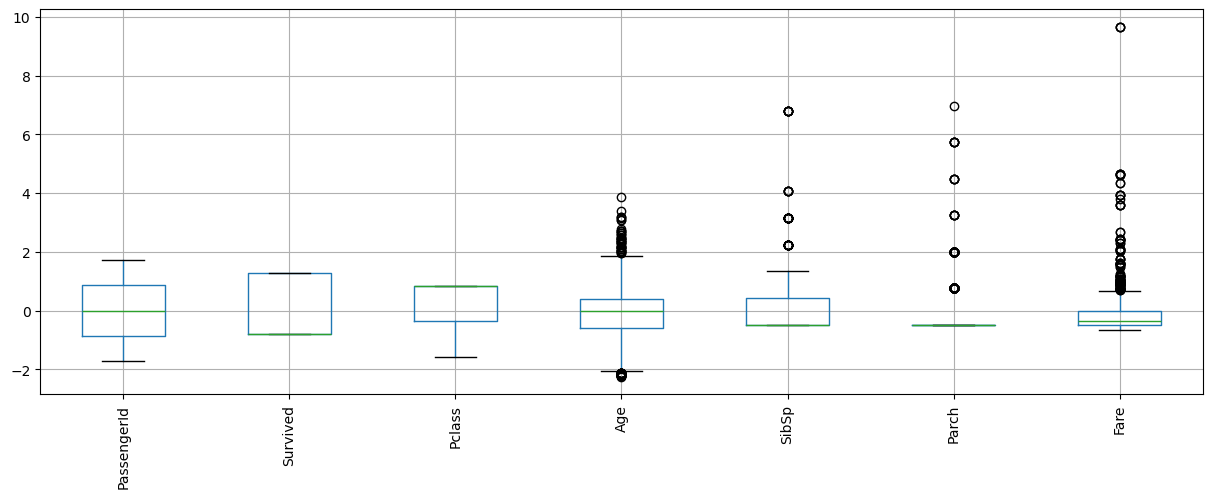

     PassengerId  Survived    Pclass  Name  Sex           Age     SibSp  \
0      -1.730108 -0.789272  0.827377   108    1 -5.924806e-01  0.432793   
2      -1.722332  1.266990  0.827377   353    0 -2.846632e-01 -0.474545   
3      -1.718444  1.266990 -1.566107   272    0  4.079260e-01  0.432793   
4      -1.714556 -0.789272  0.827377    15    1  4.079260e-01 -0.474545   
5      -1.710669 -0.789272  0.827377   554    1 -2.232906e-16 -0.474545   
..           ...       ...       ...   ...  ...           ...       ...   
884     1.706781 -0.789272  0.827377   793    1 -3.616175e-01 -0.474545   
886     1.714556 -0.789272 -0.369365   548    1 -2.077088e-01 -0.474545   
887     1.718444  1.266990 -1.566107   303    0 -8.233437e-01 -0.474545   
889     1.726220  1.266990 -1.566107    81    1 -2.846632e-01 -0.474545   
890     1.730108 -0.789272  0.827377   220    1  1.770629e-01 -0.474545   

        Parch  Ticket      Fare  Cabin  Embarked  
0   -0.473674     523 -0.502445     47         2

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers using boxplot
plt.figure(figsize=(15, 5))
df[num_cols].boxplot()
plt.xticks(rotation=90)
plt.show()

# Remove outliers using IQR method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print (df)

print(df.shape)


#### We have reduced unwanted records and no of orignal record(891, 12) has now become (577,12)